# Mapping and Plotting Tools

Geopandas uses matplotlib for map making.

In [1]:
import geopandas

def load_dataset(name): return geopandas.read_file(geopandas.datasets.get_path(name))

world = load_dataset('naturalearth_lowres')
cities = load_dataset('naturalearth_cities')

In [2]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

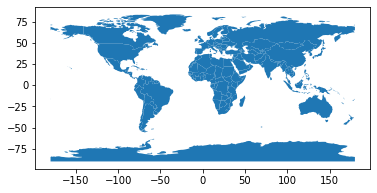

In [3]:
world.plot()

## Choropleth Maps

Trim down the world for GDP per capita analysis

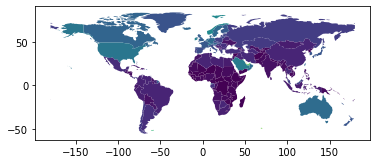

In [6]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap');

## Creating a Legend

<AxesSubplot:>

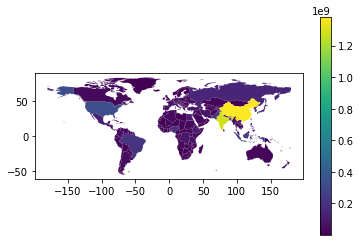

In [7]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, 1)

world.plot(column='pop_est', ax=ax, legend=True)

We want better allignment of the legend, so we do it manually

<AxesSubplot:>

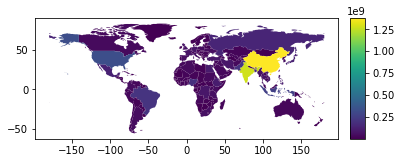

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

More maneuvering...

<AxesSubplot:>

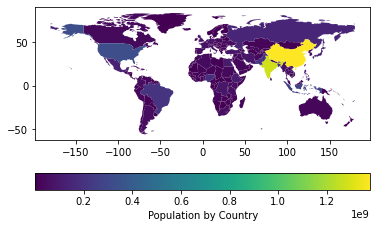

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"}
)

## Other


There's far more online but this covers the basics